In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

# Known

In [57]:
fnames = []
for fname in os.listdir('./Known/'):
    if '.pkl' in fname:
        print(fname)
        fnames.append(fname)

2023-03-02_16-12-30.pkl
2023-03-02_18-39-19.pkl
2023-03-02_19-10-28.pkl
2023-03-02_16-18-29.pkl
2023-03-02_19-24-31.pkl
2023-03-02_19-26-52.pkl
2023-03-02_19-40-49.pkl
2023-03-02_19-12-50.pkl
2023-03-02_16-05-21.pkl
2023-03-02_19-57-41.pkl


In [58]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
  'left2',
  'left2',
  'left2',
  'left1',
  'left2',
  
  'left1',
  'left1',
  'up1',
  'left1',
  'left2'
]

In [59]:
all_closests = []
for track_ind in range(10):
    with open(f'./Known/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist/540 < 0.5:
            closest = pt
            break
    if closest < 1e6:
      all_closests.append(closest)

In [60]:
# Time to 0.5 cm for known policy
known = np.array(all_closests) / 3

# Learned

In [61]:
fnames = []
for fname in os.listdir('./Expts/'):
    if '.pkl' in fname and 'actions' not in fname:
        print(fname)
        fnames.append(fname)

2021-10-27_09-52-07.pkl
2021-10-27_09-18-52.pkl
2021-10-27_11-53-30.pkl
2021-10-27_11-01-02.pkl
2021-10-27_10-35-06.pkl
2021-10-27_15-07-49.pkl
2021-10-27_16-09-51.pkl
2021-10-27_16-21-35.pkl
2021-10-27_15-45-08.pkl
2021-10-27_11-28-49.pkl
2021-10-27_14-44-17.pkl


In [73]:
tdict = {
    'up':   [1080,-360],
    'down': [1080,-1560],
    'left': [380,-960],
    'right':[1780,-960],
    'center': [1080,-960]
}

targets = [
  'right',
  'center',
  'right',
  'left',
  'up',
  
  'up',
  'left',
  'left',
  'down',
  'down',
  'center'
]

In [85]:
all_closests = []
for track_ind in range(10):
    with open(f'./Expts/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist/480 < 0.5:
            closest = pt
            break
    if closest < 1e6:
      all_closests.append(closest)

In [86]:
# Time to 0.5 cm for expt policy
expt = np.array(all_closests) / 3

In [90]:
known = known[1:]

(0.0, 500.0)

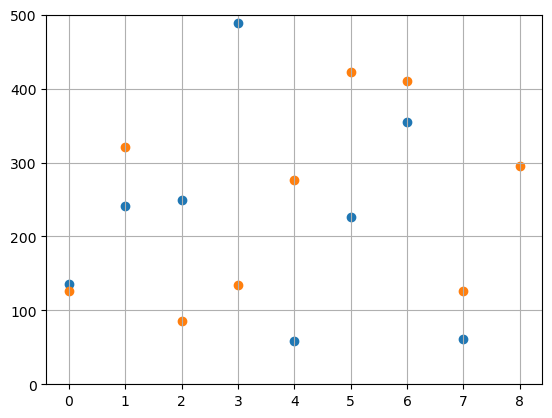

In [92]:
plt.scatter(range(len(known)), known)
plt.scatter(range(len(expt)), expt)
plt.grid();
plt.ylim([0,500])

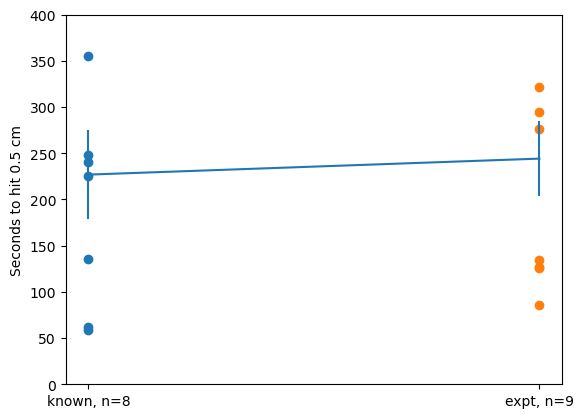

In [104]:
plt.errorbar(range(2), [np.mean(known), np.mean(expt)], yerr=[np.std(known)/np.sqrt(8), np.std(expt)/3.])
plt.ylim(0,400)
plt.scatter(np.zeros(8), known)
plt.scatter(np.ones(9), expt)
plt.ylabel('Seconds to hit 0.5 cm')
plt.xticks(range(2), ['known, n=8', 'expt, n=9'])

plt.savefig('Known vs expt times.svg')

In [94]:
np.std(known), np.std(expt)

(136.7332916869756, 121.9226632028235)

In [ ]:
For target distance of roughly 1.5 cm. 